In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None) # shows all columns

# Mexico COVID-19 clinical data

## 1. Data

<p>This aim of this analysis is to predict whether a patient with certain clinical record attributes will test positive or not for COVID-19 by RT-PCR test. The data is obtained from the Directorate of Epidemiology in Mexico. More info on sources and preprocessing here.</p>

In [2]:
data = pd.read_csv('../mexico_covid19.csv')

In [49]:
# Basic description of features
data.EDAD.describe()

count    216249.000000
mean         42.553788
std          16.987397
min           0.000000
25%          31.000000
50%          41.000000
75%          53.000000
max         120.000000
Name: EDAD, dtype: float64

In [45]:
jolichet = data[data.EDAD >= 100]
jolichet = jolichet[data.RESULTADO == 1]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [46]:
len(jolichet)

24

In [47]:
jolichet

,id,FECHA_ARCHIVO,ID_REGISTRO,ENTIDAD_UM,ENTIDAD_RES,RESULTADO,DELAY,ENTIDAD_REGISTRO,ENTIDAD,ABR_ENT,FECHA_ACTUALIZACION,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
7624,11244,2020-04-12,086481,25,25,1,0,25,Sinaloa,SL,2020-04-19,2,12,1,25,11.0,2,2020-04-06,2020-04-06,9999-99-99,2,1,102,1,2,2,2,2,2,2,2,2,2,2,2,2,2,99,99,97,2
40570,343677,2020-04-19,0a5b24,30,30,1,0,30,Veracruz,VZ,2020-04-19,1,12,2,30,193.0,2,2020-04-16,2020-04-12,9999-99-99,2,1,100,1,97,2,2,2,2,2,2,2,2,2,2,1,2,99,99,97,1
47556,486153,2020-04-22,01b7e6,9,9,1,0,9,Ciudad de Mexico,DF,2020-04-22,1,12,2,99,5.0,1,2020-04-20,2020-04-11,9999-99-99,97,2,102,1,97,2,2,2,2,2,2,2,2,2,2,2,1,99,99,97,97
50918,539050,2020-04-23,0a5f6e,9,9,1,0,9,Ciudad de Mexico,DF,2020-04-23,2,12,1,9,13.0,1,2020-04-17,2020-04-10,9999-99-99,97,2,113,1,2,2,2,2,2,2,1,2,2,2,2,2,2,99,México,99,97
63055,769728,2020-04-27,0f7360,30,30,1,0,30,Veracruz,VZ,2020-04-27,1,12,2,30,193.0,1,2020-04-24,2020-04-20,9999-99-99,97,2,100,1,97,2,1,2,2,2,1,2,2,2,2,2,2,99,MÃ©xico,99,97
84978,1359467,2020-05-03,15fb17,23,23,1,0,23,Quintana Roo,QR,2020-05-03,1,12,2,31,5.0,2,2020-04-30,2020-04-28,9999-99-99,2,1,100,1,97,2,2,2,2,2,1,2,2,2,2,2,2,99,MÃ©xico,99,1
87114,1389825,2020-05-04,16f185,9,9,1,0,9,Ciudad de Mexico,DF,2020-05-04,2,8,1,9,2.0,2,2020-04-28,2020-04-26,9999-99-99,2,1,101,1,2,2,2,2,2,2,1,2,2,2,2,2,2,99,MÃ©xico,99,2
95680,1677789,2020-05-06,0e1d21,19,19,1,0,19,Nuevo Leon,NL,2020-05-06,2,12,2,19,26.0,1,2020-05-05,2020-05-05,9999-99-99,97,2,101,1,97,2,2,2,2,2,2,2,2,1,2,2,2,99,MÃ©xico,99,97
98855,1781089,2020-05-07,06d57c,11,11,1,0,11,Guanajuato,GT,2020-05-07,2,12,2,11,27.0,2,2020-05-04,2020-04-30,9999-99-99,2,1,101,1,97,2,1,2,2,2,1,2,2,2,2,2,2,99,MÃ©xico,99,2
100714,1778084,2020-05-07,1228a4,19,19,1,0,19,Nuevo Leon,NL,2020-05-07,2,12,1,19,26.0,1,2020-05-05,2020-05-05,9999-99-99,97,2,101,1,2,2,2,2,2,2,2,2,2,2,2,2,1,99,MÃ©xico,99,97


## 2. Preprocess

<p>We will use columns already factored with numeric values and will remove columns that aren't relevant.<p>

In [3]:
# Make a copy of the data frame so that we don't override the original dataframe
df = data.copy()

In [4]:
# Take a glance at the variables
df.keys()

Index(['id', 'FECHA_ARCHIVO', 'ID_REGISTRO', 'ENTIDAD_UM', 'ENTIDAD_RES',
       'RESULTADO', 'DELAY', 'ENTIDAD_REGISTRO', 'ENTIDAD', 'ABR_ENT',
       'FECHA_ACTUALIZACION', 'ORIGEN', 'SECTOR', 'SEXO', 'ENTIDAD_NAC',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'FECHA_INGRESO', 'FECHA_SINTOMAS',
       'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO',
       'HABLA_LENGUA_INDIG', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
       'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'MIGRANTE',
       'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [5]:
# Check dtypes for each column
# df.dtypes

In [6]:
# Exclude features as described above
df = df[df.columns[~df.columns.isin(
    ['id', 'ID_REGISTRO',
     'FECHA_ARCHIVO', 'FECHA_ACTUALIZACION', 'FECHA_DEF', 'FECHA_INGRESO','FECHA_SINTOMAS',
     'ABR_ENT', 'ENTIDAD', 'MIGRANTE', 'NACIONALIDAD', 'ORIGEN', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN']
)]]

In [7]:
df.keys()

Index(['ENTIDAD_UM', 'ENTIDAD_RES', 'RESULTADO', 'DELAY', 'ENTIDAD_REGISTRO',
       'SECTOR', 'SEXO', 'ENTIDAD_NAC', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'INTUBADO', 'NEUMONIA', 'EDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'UCI'],
      dtype='object')

In [8]:
# Various ways to check for NaN, NA and NULL
# df.isnull()
# df.isnull().sum()
# df.isnull().values.any()
# df.isnull().values.sum()
# df.isnull().any()

In [9]:
# There are a few rows without the city code attribute - so we should remove them
df = df[~df.isnull().any(axis=1)]

In [10]:
# We only have data that contains either negative or positive results (ie excludes ongoing tests)
print(df['RESULTADO'].unique())

[2 1]


In [11]:
# If we had more than two categories, we would have to remove them (the original data adds the factor `3``)
# df = df[df.RESULTADO != 3]

In [12]:
# Since we have binary target data, we should follow convention and refactor them (0=negative, 1=positive)
df['RESULTADO'] = df['RESULTADO'].astype(str).str.replace('2','0')
df['RESULTADO'] = df['RESULTADO'].astype(str).str.replace('1','1')

In [ ]:
df = df[~df.SECTOR.str.startswith(('9'))]
df = df[~df.ENTIDAD_NAC.str.startswith(('9'))]
df = df[~df.MUNICIPIO_RES.str.startswith(('9'))]
df = df[~df.INTUBADO.str.startswith(('9'))]
df = df[~df.NEUMONIA.str.startswith(('9'))]
df = df[~df.SECTOR.str.startswith(('9'))]

In [68]:
# Convert whole df to numeric: stackoverflow.com/a/56458750/4848278
df = df.apply(pd.to_numeric, errors='ignore')

In [69]:
# We want every remaining column to be of numeric type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216243 entries, 0 to 216248
Data columns (total 28 columns):
ENTIDAD_UM            216243 non-null int64
ENTIDAD_RES           216243 non-null int64
RESULTADO             216243 non-null int64
DELAY                 216243 non-null int64
ENTIDAD_REGISTRO      216243 non-null int64
ORIGEN                216243 non-null int64
SECTOR                216243 non-null int64
SEXO                  216243 non-null int64
ENTIDAD_NAC           216243 non-null int64
MUNICIPIO_RES         216243 non-null float64
TIPO_PACIENTE         216243 non-null int64
INTUBADO              216243 non-null int64
NEUMONIA              216243 non-null int64
EDAD                  216243 non-null int64
EMBARAZO              216243 non-null int64
HABLA_LENGUA_INDIG    216243 non-null int64
DIABETES              216243 non-null int64
EPOC                  216243 non-null int64
ASMA                  216243 non-null int64
INMUSUPR              216243 non-null int64
HIPERTE

## 2. Explore the features

### Create a target column
We are aiming to predict whether a patient with pending COVID-19 results will get a positive or a negative result:
<ul>
<li>As lab results are processed, this leaves a window when it's uncertain whether a result will return positive or negative (we are assuming that the epidemiology data can be infomative for the prediction).</li>
<li>Also, this could help predict for similar symptoms e.g. from a survey or an app that checks for similar data (ideally, containing most of the parameters that can be assessed without coming into the hospital, like e.g. age of the person.</li>
</ul>
<p>The value of the lab result comes from a RT-PCR, and is stored in <code>RESULTADO</code>, where <code>0 = NEGATIVE</code> and <code>1 = POSITIVE</code>. Let's rename this to <code>target</code> so that it's more convenient to work with.</p>

In [70]:
# Rename target column as 'target' for clarity
df.rename(
    columns={'RESULTADO': 'target'},
    inplace=True
)

In [71]:
# Remove target variable to move it to the first position of dataframe
col_name = 'target'
first_col = df.pop(col_name)

In [72]:
# Now we can use Pandas insert() function and insert the opped column into first position of the dataframe
# The first argument of insert() function is the location we want to insert, here it is 0
df.insert(0, col_name, first_col)

In [73]:
df.head()

,target,ENTIDAD_UM,ENTIDAD_RES,DELAY,ENTIDAD_REGISTRO,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,UCI
0,0,25,25,0,25,2,12,2,25,13.0,1,97,2,74,97,2,1,2,2,2,1,2,2,1,2,2,2,97
1,0,14,14,0,14,1,4,1,16,98.0,2,2,2,71,2,2,1,1,2,2,1,2,2,1,2,1,99,2
2,1,8,8,0,8,1,4,2,8,19.0,2,2,1,50,97,2,2,2,2,2,2,2,2,2,2,2,99,2
3,1,9,15,0,9,2,4,1,15,33.0,1,97,2,25,2,2,2,2,2,2,2,2,2,1,2,2,99,97
4,0,9,9,0,9,1,4,1,99,15.0,1,97,2,28,2,2,2,2,2,2,2,2,2,2,2,2,99,97


### Target incidence
<p>Target incidence is the number of cases of each individual target value in the data. It represents the proportion of categorical variable in a target column. Target incidence gives us an idea of how balanced (imbalanced) is our data.</p>

In [74]:
# Print target incidence proportions and round to 3 decimal places
df.target.value_counts(normalize=True).round(3)

0    0.632
1    0.368
Name: target, dtype: float64

### Age distribution

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df_positive = df.loc[df['target'] == 0]
df_negative = df.loc[df['target'] == 1]

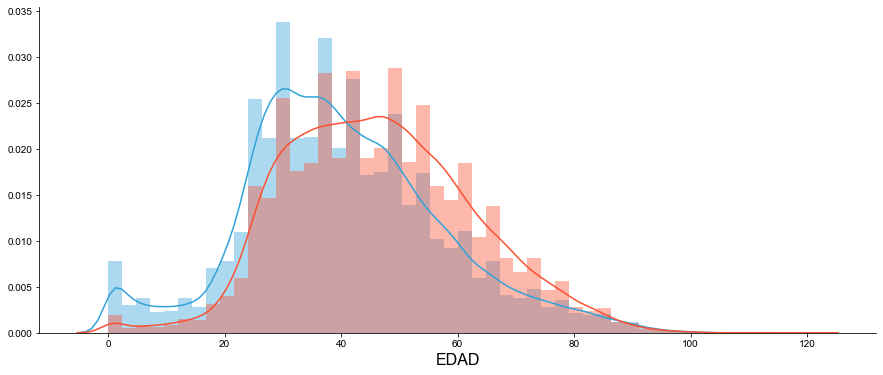

In [77]:
five_thirty_eight = [
    '#30a2da',
    '#fc4f30',
    '#e5ae38',
    '#6d904f',
    '#8b8b8b',
]

plt.figure(figsize = (15,6))
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

sns.set_palette(sns.color_palette(five_thirty_eight))

sns.distplot(df_positive['EDAD'])
sns.distplot(df_negative['EDAD'])

sns.set(style='ticks')
sns.despine()

## 3. Model
<p>We want to predict whether or not a person with a certain clinical profile may result COVID-19 positive when tested for a real-time PCR. The model for this is a binary classifier, meaning that there are only 2 possible outcomes:</p>

<ul>
    <li><code>0</code> - the lab result is COVID-19 negative</li>
    <li><code>1</code> - the lab result is COVID-19 positive</li>
</ul>

<p>As laboratory results are processed, each pending patient record leaves a time window when it's uncertain whether a result will return positive or negative (we are assuming that the epidemiology data can be infomative for the prediction).</p>

<p>Also, this could help predict for similar symptoms e.g. from a survey or an app that checks for similar data (ideally, containing most of the parameters that can be assessed without coming into the hospital, like e.g. age of the patient).</p>

In [81]:
df_covid = df.copy()

In [82]:
# Check shape of data (rows vs columns)
df_covid.shape

(216243, 28)

## Model performance
<p>To measure the performance of a model, we need several elements:</p>

<ul>
    <li><b>Confusion matrix</b></li>: Also known as the error matrix, allows visualization of the performance of an algorithm
<br>
<br>

    True Positive (TP) : COVID-19 positive correctly identified as Infected
    True Negative (TN) : Not Infected correctly identified as not Infected
    False Positive (FP) : Not Infected incorrectly identified as COVID-19 positive
    False Negative (FN) : COVID-19 positive incorrectly identified as Not Infected
</ul>

<ul>
    <li><b>Metrics</b></li>: Machine learning have several useful metrics.
<br>
<br>

    Accuracy : (TP + TN) / (TP + TN + FP +FN)
    Precision : TP / (TP + FP)
    Recall : TP / (TP + FN)
    F1 score : 2 x ((Precision x Recall) / (Precision + Recall))
</ul>

<ul>
    <li><b>ROC Curve</b></li>: The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
</ul>

<ul><li><b>Precision Recall Curve</b></li>: Shows the tradeoff between precision and recall for different threshold

In [83]:
# Import the libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

### Split the dataset

In [84]:
X = df_covid.drop('target',axis=1)
y = df_covid.target

### Machine Learning models

<p>We will train out data on different machine learning models and use different techniques on each model and then compare our finding at the end to determine which model is working best for out data.</p>

In [85]:
avg_accuracies = {}
accuracies = {}
roc_auc = {}
pr_auc = {}

In [116]:
def cal_score(name,model,folds):

    scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    avg_result=[]
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = folds, scoring = sc)
        avg_result.append(np.average(scores))
    df_avg_score=pd.DataFrame(avg_result)
    df_avg_score= df_avg_score.rename(index={0: 'Accuracy', 1:'Precision', 2:'Recall',3:'F1 score',4:'Roc auc'},columns={0:'Average'})
    avg_accuracies[name]=np.round(df_avg_score.loc['Accuracy']*100,3)
    values=[np.round(df_avg_score.loc['Accuracy']*100,3),np.round(df_avg_score.loc['Precision']*100,3),np.round(df_avg_score.loc['Recall']*100,3),np.round(df_avg_score.loc['F1 score']*100,3),np.round(df_avg_score.loc['Roc auc']*100,3)]
    plt.figure(figsize=(15,8))
    sns.set_palette('mako')
    ax=sns.barplot(x=['Accuracy','Precision','Recall','F1 score','Roc auc'],y=values)
    plt.yticks(np.arange(0,100,10))
    plt.ylabel('Percentage %',labelpad=10)
    plt.xlabel('Scoring Parameters',labelpad=10)
    plt.title('Cross Validation '+str(folds)+'-Folds Average Scores',pad=20)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),xytext=(p.get_x()+0.3,p.get_height()+1.02))
    plt.show()

In [111]:
def conf_matrix(ytest,pred):
    
    plt.figure(figsize=(9,6))
    global cm1
    cm1 = confusion_matrix(ytest, pred)
    annot_kws = {'ha':'left', 'va':'top'}
    ax = sns.heatmap(cm1, annot=True, cmap='Blues', fmt='d')
    plt.title('Confusion Matrix')

In [117]:
def metrics_score(cm):
    
    total=sum(sum(cm))
    accuracy=(cm[0,0]+cm[1,1])/total
    precision = cm[1,1]/(cm[0,1]+cm[1,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
    specificity = cm[0,0]/(cm[0,1]+cm[0,0])
    values=[np.round(accuracy*100,3),np.round(precision*100,3),np.round(sensitivity*100,3),np.round(f1*100,3),np.round(specificity*100,3)]
    plt.figure(figsize=(15,8))
    sns.set_palette('magma')
    ax=sns.barplot(x=['Accuracy','Precision','Recall','F1 score','Specificity'],y=values)
    plt.yticks(np.arange(0,100,10))
    plt.ylabel('Percentage %',labelpad=10)
    plt.xlabel('Scoring Parameter',labelpad=10)
    plt.title('Metrics Scores',pad=20)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),xytext=(p.get_x()+0.3,p.get_height()+1.02))
    plt.show()

In [118]:
def plot_roc_curve(fpr, tpr):
    
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='Orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.ylabel('True Positive Rate',labelpad=10)
    plt.xlabel('False Positive Rate',labelpad=10)
    plt.title('Receiver Operating Characteristic (ROC) Curve',pad=20)
    plt.legend()
    plt.show()

In [119]:
def plot_precision_recall_curve(recall, precision):
    
    plt.figure(figsize=(8,6))
    plt.plot(recall, precision, color='orange', label='PRC')
    plt.ylabel('Precision',labelpad=10)
    plt.xlabel('Recall',labelpad=10)
    plt.title('Precision Recall Curve',pad=20)
    plt.legend()
    plt.show()

### Random Forest
<p>A Random Forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.</p>

We will store model accuracy to plot for comparison with other models.

In [92]:
accuracies['Random Forest'] = np.round(accuracy1 * 100, 3)

Plot the Confusion Matrix to describe the performance of Random Forest Classifier on a set of test data.

In [104]:
rf_cm = confusion_matrix(y_test, prediction1)

In [105]:
rf_cm

array([[21299,  5872],
       [ 7796,  8282]])

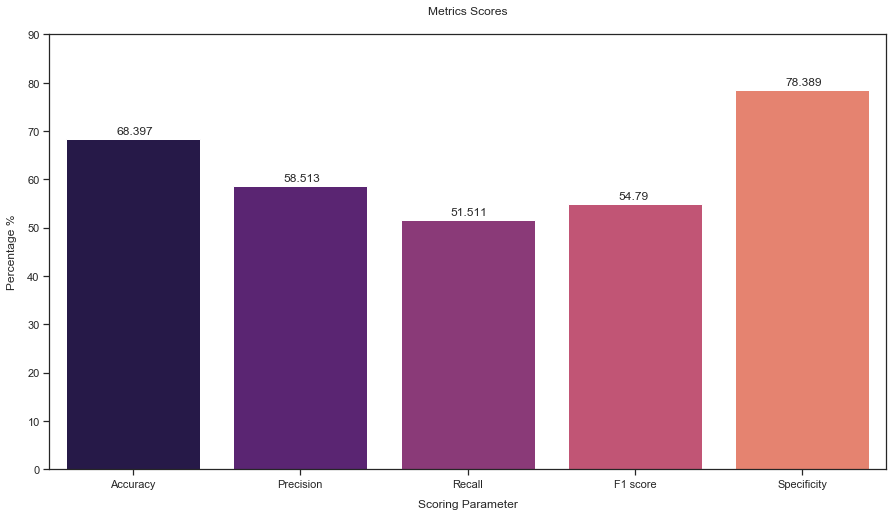

In [120]:
metrics_score(cm1)

Plotting the average of different metrics scores for further evaluation.

In [121]:
cal_score('Random Forest', rf, 5)

KeyboardInterrupt: 